In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd
import zipfile

file_name = "product_classification_and_clustering.zip"

with zipfile.ZipFile(file_name, "r") as zip_ref:
    zip_ref.extractall('./')

csv_name = "pricerunner_aggregate.csv"
df = pd.read_csv(csv_name)

df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [11]:
df.tail()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges
35310,47358,neff k4316x7gb built under larder fridge,179,47525,Neff K4316,2623,Fridges


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [15]:
df_processed = df.copy()

# Factorize 'Product Title'
df_processed['Product Title'] = pd.factorize(df['Product Title'])[0]

# Factorize 'Cluster Label'
df_processed[' Cluster Label'] = pd.factorize(df[' Cluster Label'])[0]

# Factorize 'Category Label' and get the unique categories
df_processed[' Category Label'], categories = pd.factorize(df[' Category Label'])

# Display the first few rows of the processed DataFrame
print(df_processed.head())

   Product ID  Product Title   Merchant ID   Cluster ID   Cluster Label  \
0           1              0             1            1               0   
1           2              1             2            1               0   
2           3              2             3            1               0   
3           4              3             4            1               0   
4           5              4             5            1               0   

    Category ID   Category Label  
0          2612                0  
1          2612                0  
2          2612                0  
3          2612                0  
4          2612                0  


In [16]:
#verify existence of any missing values

missing_vals = df_processed.isnull().sum()
missing_vals

Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

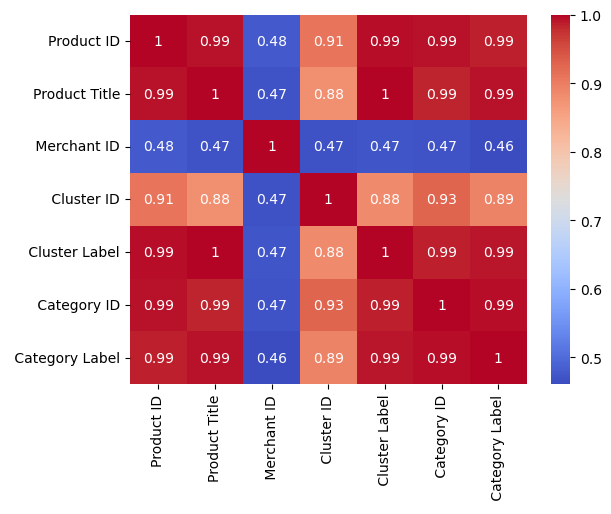

In [19]:
#Generate heat map

corr_matrix = df_processed.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [22]:
#Perform random sampling

# Perform random sampling
df_feature = df_processed.sample(n=5000, random_state=42)

# Select specific columns ('Product ID' and 'Category Label')
df_feature = df_feature[['Product ID', ' Category Label']]

# Check the resulting DataFrame
print(df_feature.head())

       Product ID   Category Label
32130       43860                9
4771        10748                1
428           429                0
14006       23568                3
6481        12520                1


In [24]:
from scipy.cluster.hierarchy import linkage

# Ensure that 'Product ID' and 'Category Label' are numeric
# If they are categorical, convert them using pd.factorize or similar methods
df_feature['Product ID'] = pd.to_numeric(df_feature['Product ID'], errors='coerce')
df_feature[' Category Label'] = pd.to_numeric(df_feature[' Category Label'], errors='coerce')

# Perform hierarchical clustering
hc_ward = linkage(df_feature, method='ward', metric='euclidean')

# Display the hierarchical clustering result
print(hc_ward)

[[1.00000000e+00 1.99000000e+03 1.00000000e+00 2.00000000e+00]
 [4.77000000e+02 8.00000000e+02 1.00000000e+00 2.00000000e+00]
 [4.00000000e+00 5.21000000e+02 1.00000000e+00 2.00000000e+00]
 ...
 [9.98600000e+03 9.99200000e+03 3.21459470e+05 1.62200000e+03]
 [9.99400000e+03 9.99500000e+03 5.48002629e+05 3.37800000e+03]
 [9.99600000e+03 9.99700000e+03 1.14505723e+06 5.00000000e+03]]


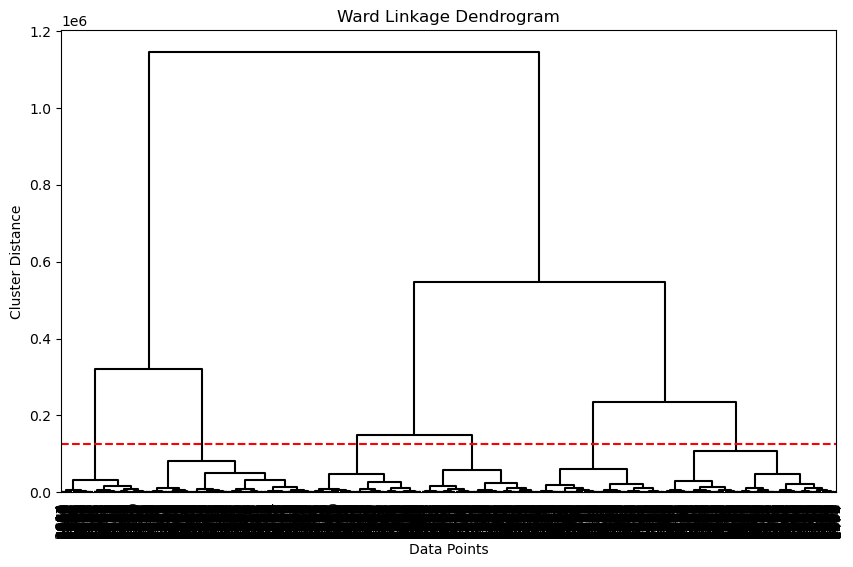

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram (linkage method 'ward')
plt.figure(figsize=(10, 6))
d_ward = dendrogram(hc_ward, leaf_rotation=90, leaf_font_size=10, link_color_func=lambda x: 'black')

# Title and labels
plt.title('Ward Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')

# Plot a horizontal line indicating the clustering point
plt.axhline(y=125000, color='r', linestyle='--')

# Show the plot
plt.show()

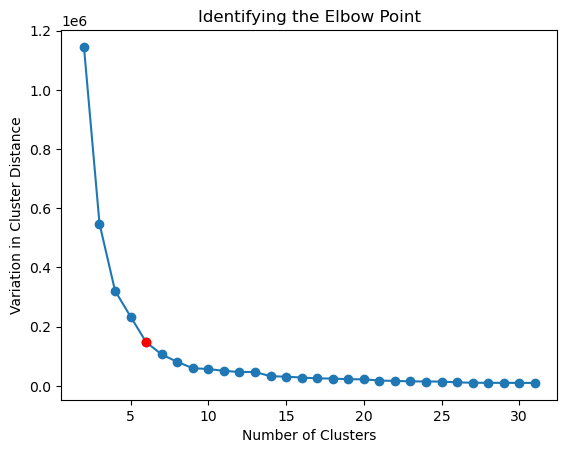

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Extract distances for the elbow plot
distances = hc_ward[-30:, 2]

# Define the number of clusters
num_clusters = np.arange(31, 1, -1)

# Plot the distances against the number of clusters
plt.plot(num_clusters, distances, marker='o')

# Mark the elbow point
plt.plot(6, hc_ward[-5, 2], color='red', marker='o')

# Title and labels
plt.title('Identifying the Elbow Point')
plt.xlabel('Number of Clusters')
plt.ylabel('Variation in Cluster Distance')

# Show the plot
plt.show()

In [28]:
num_clusters = 6
cluster_labels = cut_tree(hc_ward, n_clusters=num_clusters).flatten()

In [29]:
num_clusters = 6

ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

cluster_labels = ac.fit_predict(df_feature)

print(cluster_labels[:10])

[5 1 3 4 1 5 4 1 4 3]


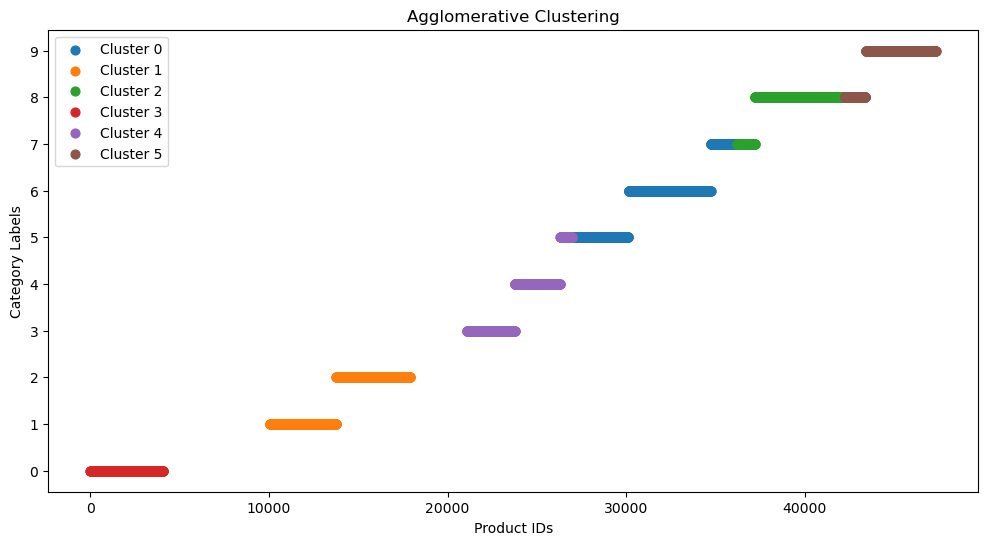

In [31]:
#Cluster Visualization

import numpy as np
import matplotlib.pyplot as plt

data = np.array(df_feature.values)

plt.figure(figsize=(12, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_label)
    plt.scatter(data[cluster_indices[0], 0], data[cluster_indices[0], 1], s=40, label=f'Cluster {cluster_label}')

categories = np.unique(df_feature[' Category Label'])
plt.yticks(np.arange(len(categories)), categories)

plt.title('Agglomerative Clustering')
plt.xlabel('Product IDs')
plt.ylabel('Category Labels')
plt.legend()
plt.show()